<a href="https://colab.research.google.com/github/sychun/colab/blob/master/h_nn_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data), type(train_data)

(8982, numpy.ndarray)

In [5]:
len(test_data)

2246

In [8]:
train_data[10][:10], train_labels[10]

([1, 245, 273, 207, 156, 53, 74, 160, 26, 14], 3)

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[10]

3

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [16]:
train_labels.min(),train_labels.max()

(0, 45)

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [20]:
one_hot_train_labels[:1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [18]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.6594 - accuracy: 0.4956 - val_loss: 1.7029 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4017 - accuracy: 0.7112 - val_loss: 1.3081 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0387 - accuracy: 0.7785 - val_loss: 1.1301 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8090 - accuracy: 0.8289 - val_loss: 1.0450 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6470 - accuracy: 0.8613 - val_loss: 0.9821 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5191 - accuracy: 0.8879 - val_loss: 0.9330 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4167 - accuracy: 0.9085 - val_loss: 0.9131 - val_accuracy: 0.8140
Epoch 8/20
16

In [25]:
import matplotlib.pyplot as plt

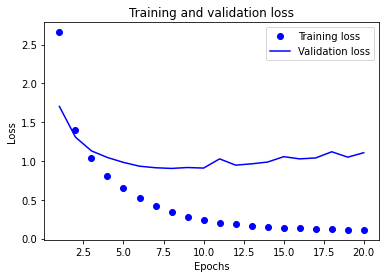

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

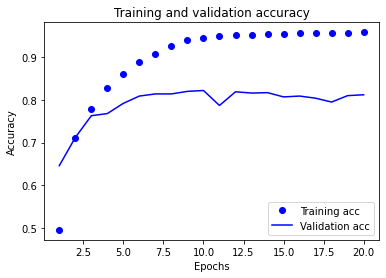

In [28]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.6940 - accuracy: 0.5340 - val_loss: 1.7655 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4433 - accuracy: 0.7071 - val_loss: 1.3107 - val_accuracy: 0.7280
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0510 - accuracy: 0.7751 - val_loss: 1.1295 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8237 - accuracy: 0.8287 - val_loss: 1.0310 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6521 - accuracy: 0.8672 - val_loss: 0.9706 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5192 - accuracy: 0.8948 - val_loss: 0.9339 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4206 - accuracy: 0.9146 - val_loss: 0.9301 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [30]:
results

[0.9943209290504456, 0.7867319583892822]

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0000001

In [34]:
np.argmax(predictions[0])

3

In [35]:
predictions[0][3]

0.92518073

In [39]:
# one-hot-encoding을 사용하지 않고

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [41]:
y_train[0]

3

In [42]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 3.2866 - accuracy: 0.1062 - val_loss: 2.6522 - val_accuracy: 0.2850
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.0133 - accuracy: 0.4886 - val_loss: 1.6484 - val_accuracy: 0.6150
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3807 - accuracy: 0.6419 - val_loss: 1.4419 - val_accuracy: 0.6420
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1721 - accuracy: 0.7057 - val_loss: 1.3775 - val_accuracy: 0.6920
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0391 - accuracy: 0.7533 - val_loss: 1.3606 - val_accuracy: 0.7060
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9410 - accuracy: 0.7756 - val_loss: 1.3333 - val_accuracy: 0.7110
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8586 - accuracy: 0.7908 - val_loss: 1.3412 - val_accuracy: 0.7100
Epoch 8/20
63